<a href="https://colab.research.google.com/github/konrado10/NaukaGIT/blob/main/Zad142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konwolucyjne Sieci Neuronowe - CNN

## Klasyfikator binarny

### Zad 11

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [21]:
img = load_img('dog.jpeg')
img

FileNotFoundError: ignored

In [ ]:
data = img_to_array(img)
data.shape

In [ ]:
data

In [ ]:
data[:,:,1]

In [ ]:
data[:,:,0]

In [ ]:
samples = np.expand_dims(data, 0)
samples.shape

In [ ]:
datagen = ImageDataGenerator()
iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.3)
iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.3,
                             height_shift_range=0.2)
iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
datagen = ImageDataGenerator(rotation_range=40)
iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
datagen = ImageDataGenerator(shear_range=20)
iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.4)
iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
datagen = ImageDataGenerator(horizontal_flip = True)
iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.4,
                             width_shift_range=0.3,
                             height_shift_range=0.3,
                             rotation_range=45,
                             brightness_range=[0.4,1.5],
                             shear_range=20,
                             horizontal_flip=True)
iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

### Zad 12

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

np.set_printoptions(precision=6, suppress=True)

In [23]:
!wget https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
!unzip -q flying-vehicles.zip

--2021-01-21 16:29:51--  https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.15.112, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540232238 (1.4G) [application/x-zip-compressed]
Saving to: ‘flying-vehicles.zip.1’

flying-vehicles.zip 100%[===================>]   1.43G   144MB/s    in 6.9s    

2021-01-21 16:29:58 (213 MB/s) - ‘flying-vehicles.zip.1’ saved [1540232238/1540232238]

replace data/planes/drone/00000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace data/planes/drone/00000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:
!rm -rf ./images

In [25]:
base_dir = './data/planes'
raw_no_of_files = {}
classes = ['drone', 'fighter-jet', 'helicopter', 'missile', 'passenger-plane', 'rocket']
for dir in classes:
    raw_no_of_files[dir] = len(os.listdir(os.path.join(base_dir, dir)))

raw_no_of_files.items()

dict_items([('drone', 1332), ('fighter-jet', 1867), ('helicopter', 1387), ('missile', 1334), ('passenger-plane', 1424), ('rocket', 1186)])

In [26]:
data_dir = './images'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

train_drone_dir = os.path.join(train_dir, 'drone')
train_passenger_dir = os.path.join(train_dir, 'passenger')

valid_drone_dir = os.path.join(valid_dir, 'drone')
valid_passenger_dir = os.path.join(valid_dir, 'passenger')

test_drone_dir = os.path.join(test_dir, 'drone')
test_passenger_dir = os.path.join(test_dir, 'passenger')

for dir in [train_dir, valid_dir, test_dir]:
    if not os.path.exists(dir):
        os.mkdir(dir)

dirs = [train_drone_dir, train_passenger_dir, valid_drone_dir, valid_passenger_dir, test_drone_dir, test_passenger_dir]

for dir in dirs:
    if not os.path.exists(dir):
        os.mkdir(dir)

In [27]:
drone_fnames = os.listdir(os.path.join(base_dir, 'drone'))
passenger_fnames = os.listdir(os.path.join(base_dir, 'passenger-plane'))

drone_fnames = [fname for fname in drone_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
passenger_fnames = [fname for fname in passenger_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

### Zad 13

In [28]:
size = min(len(drone_fnames), len(passenger_fnames))

train_size = int(np.floor(0.7 * size))
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

train_idx = train_size
valid_idx = train_size + valid_size
test_idx = train_size + valid_size + test_size

In [29]:
for i, fname in enumerate(drone_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(train_drone_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(valid_drone_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(test_drone_dir, fname)
        shutil.copyfile(src, dst)

for i, fname in enumerate(passenger_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(train_passenger_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(valid_passenger_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(test_passenger_dir, fname)
        shutil.copyfile(src, dst) 

print('drone - zbiór treningowy', len(os.listdir(train_drone_dir)))
print('drone - zbiór walidacyjny', len(os.listdir(valid_drone_dir)))
print('drone - zbiór testowy', len(os.listdir(test_drone_dir)))


drone - zbiór treningowy 919
drone - zbiór walidacyjny 262
drone - zbiór testowy 131


(-0.5, 999.5, 999.5, -0.5)

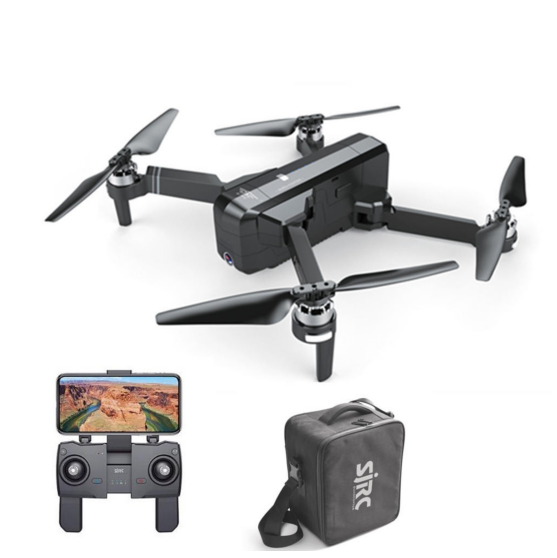

In [30]:
#@title Wybierz indeks zdjęcia

idx=900 #@param {'type':'slider',min:0,max:919}
names_mapping = dict(enumerate(drone_fnames))
img_path = os.path.join(train_drone_dir, names_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

(-0.5, 1359.5, 764.5, -0.5)

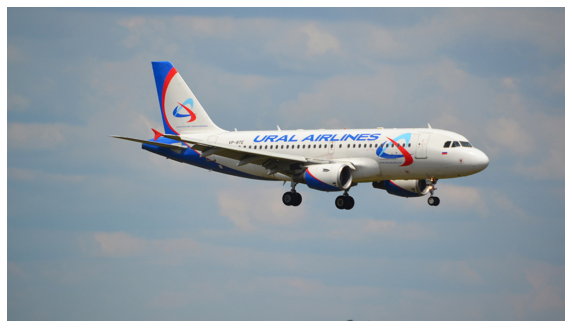

In [31]:
#@title Wybierz indeks zdjęcia

idx=111 #@param {'type':'slider',min:0,max:919}
names_mapping = dict(enumerate(passenger_fnames))
img_path = os.path.join(train_passenger_dir, names_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

In [32]:
def data_generator(class_mode, directory_train, directory_valid, directory_test, target_size):
    train_datagen = ImageDataGenerator(
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             rotation_range = 40,
                             rescale = 1./255.,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')
    valid_datagen = ImageDataGenerator(rescale=1./255.)
    test_datagen = ImageDataGenerator(rescale=1/255)

    test_generator = test_datagen.flow_from_directory(
                            directory = directory_test,
                            target_size = target_size, #(150,150)
                            batch_size = 1,
                            class_mode = class_mode, #'binary'
                            shuffle=False)
    train_generator = train_datagen.flow_from_directory(
                            directory = directory_train, 
                            target_size = target_size,
                            batch_size = 32,
                            class_mode = class_mode)
    valid_generator = valid_datagen.flow_from_directory(
                            directory = directory_valid, 
                            target_size = target_size,
                            batch_size = 32,
                            class_mode = class_mode)
    
data_generator(class_mode = 'binary', directory_train = train_dir, directory_valid = valid_dir, directory_test = test_dir, target_size = (150,150))

Found 262 images belonging to 2 classes.
Found 1838 images belonging to 2 classes.
Found 524 images belonging to 2 classes.


In [33]:
    train_datagen = ImageDataGenerator(
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             rotation_range = 40,
                             rescale = 1./255.,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = 'nearest')
    valid_datagen = ImageDataGenerator(rescale=1./255.)
    train_generator = train_datagen.flow_from_directory(
                            directory = train_dir, 
                            target_size = (150,150),
                            batch_size = 32,
                            class_mode = 'binary')
    valid_generator = valid_datagen.flow_from_directory(
                            directory = valid_dir, 
                            target_size =(150,150),
                            batch_size = 32,
                            class_mode = 'binary')

Found 1838 images belonging to 2 classes.
Found 524 images belonging to 2 classes.


In [34]:
def display_augmented_images(directory, idx):
    
    import os
    from tensorflow.keras.preprocessing import image
    import numpy as np
    import matplotlib.pyplot as plt
    
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150,150))

    x = image.img_to_array(img)
    x = x.reshape((1,)+ x.shape)

    i = 1
    plt.figure(figsize=(20,14))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3,4,i)
        plt.grid('off')
        plt.axis('off')
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

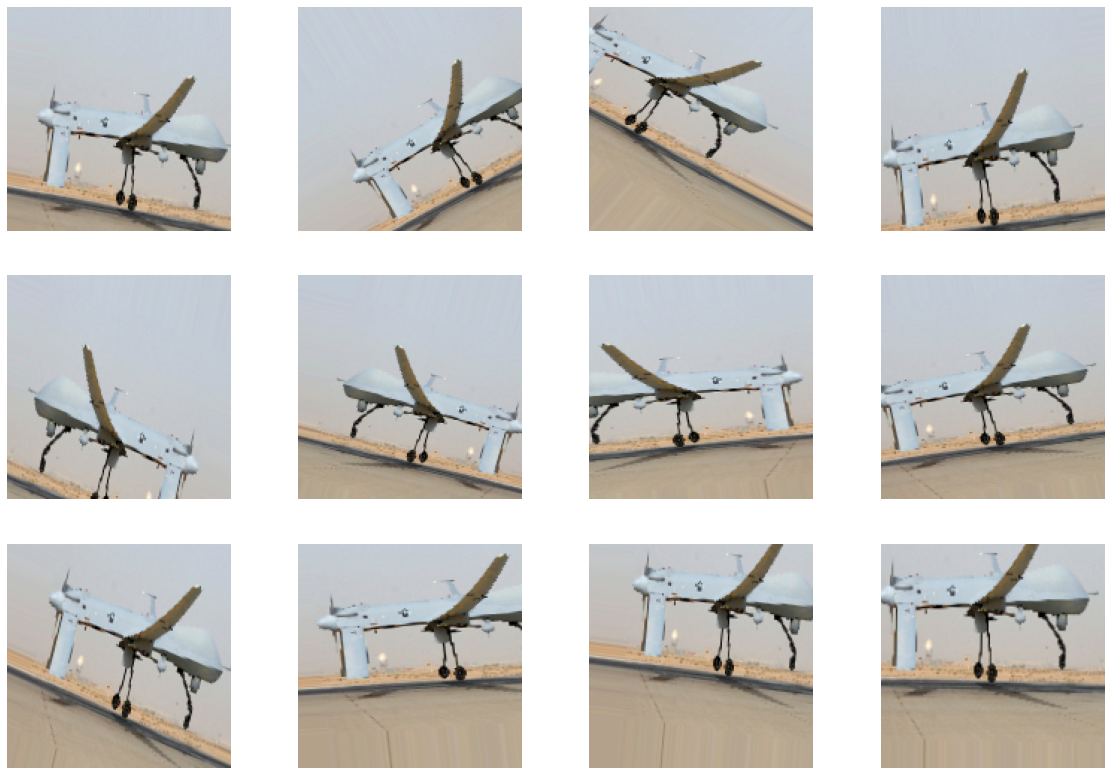

In [35]:
#@title Wybierz indeks zdjęcia

idx=331 #@param {'type':'slider',min:0,max:919}
display_augmented_images(train_drone_dir, idx)

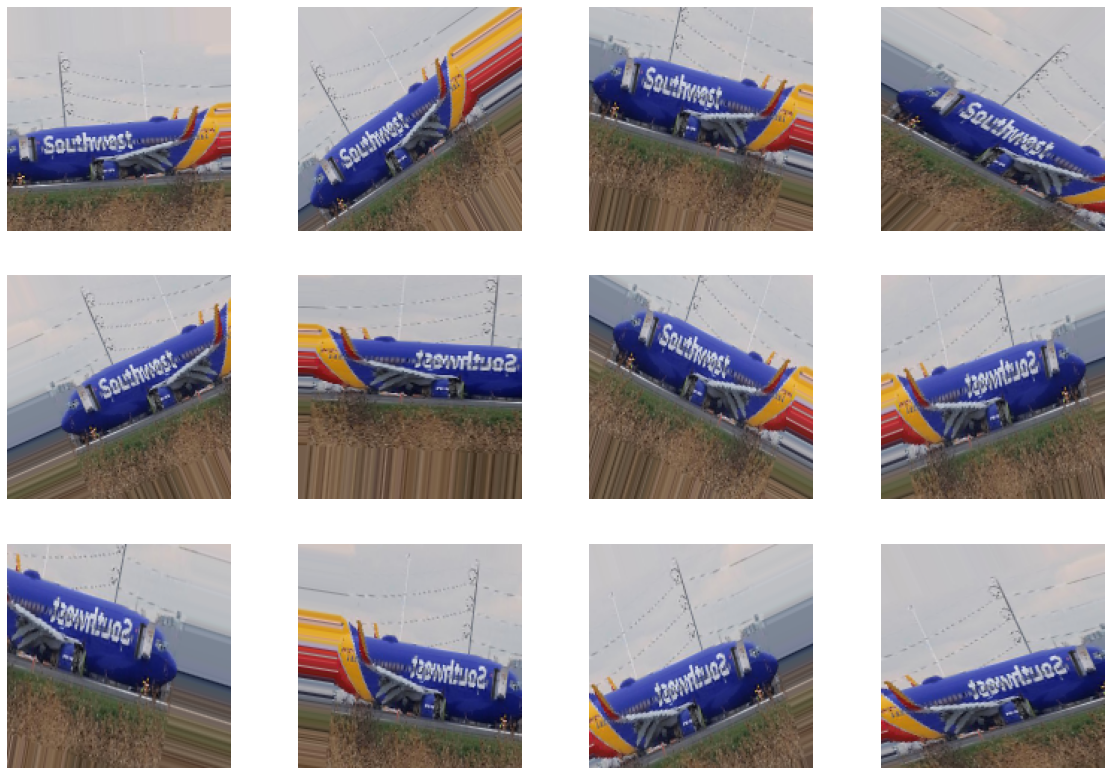

In [36]:
#@title Wybierz indeks zdjęcia

idx=331 #@param {'type':'slider',min:0,max:919}
display_augmented_images(train_passenger_dir, idx)

### Zad 14

In [37]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [38]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
!rm -rf logs
!mkdir logs

In [40]:
tensorboard = TensorBoard(log_dir='logs')

In [42]:
batch_size = 32
steps_per_epoch = train_size//batch_size
validation_steps = valid_size//batch_size
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=30,
                              callbacks=[tensorboard],
                              validation_steps=validation_steps,
                              validation_data=valid_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/30
28/28 [==============================] - 23s 815ms/step - loss: 0.6965 - accuracy: 0.5234 - val_loss: 0.6875 - val_accuracy: 0.5039
Epoch 2/30
28/28 [==============================] - 21s 739ms/step - loss: 0.6895 - accuracy: 0.5444 - val_loss: 0.6856 - val_accuracy: 0.5273
Epoch 3/30
28/28 [==============================] - 23s 818ms/step - loss: 0.6810 - accuracy: 0.5478 - val_loss: 0.6778 - val_accuracy: 0.5859
Epoch 4/30
28/28 [==============================] - 23s 819ms/step - loss: 0.6727 - accuracy: 0.5603 - val_loss: 0.6622 - val_accuracy: 0.6445
Epoch 5/30
28/28 [==============================] - 21s 770ms/step - loss: 0.6690 - accuracy: 0.5866 - val_loss: 0.6441 - val_accuracy: 0.6445
Epoch 6/30
28/28 [==============================] - 24s 853ms/step - loss: 0.6559 - accuracy: 0.6036 - val_loss: 0.6666 - val_accuracy: 0.5547
Epoch 7/30
28/28 [==============================] - 22s 789ms/step - loss: 0.6478 - accuracy: 0.6250 - val_loss: 0.6243 - val_accuracy: 0.6328

In [ ]:
%load_ext tensorboard

In [ ]:
!tensorboard dev upload --logdir logs

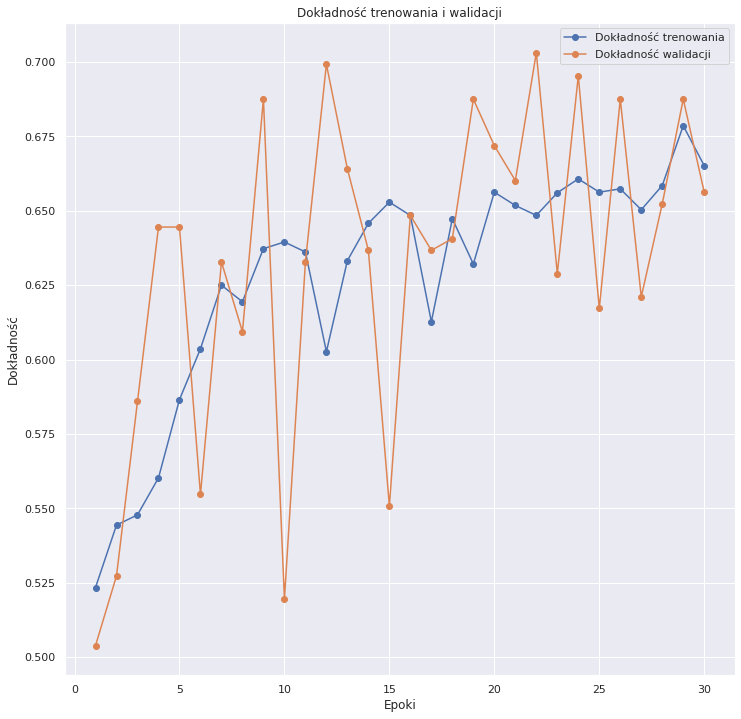

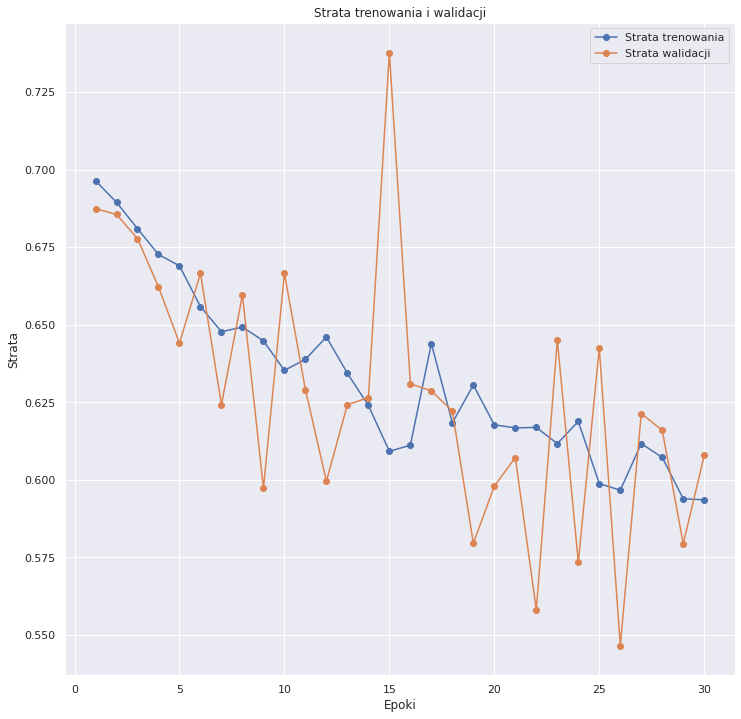

In [43]:
def make_accuracy_plot(history = history):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(12,12))
    plt.plot(epochs, acc, label = 'Dokładność trenowania', marker = 'o')
    plt.plot(epochs, val_acc, label = 'Dokładność walidacji', marker = 'o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history = history):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss)+1)

    plt.figure(figsize=(12,12))
    plt.plot(epochs, loss, label = 'Strata trenowania', marker = 'o')
    plt.plot(epochs, val_loss, label = 'Strata walidacji', marker = 'o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()
    
make_accuracy_plot(history)
make_loss_plot(history)

In [44]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [45]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [46]:
len(model.trainable_weights)

30

In [47]:
conv_base.trainable = False

In [48]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [49]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch =steps_per_epoch,
                              epochs=40,
                              validation_steps=validation_steps,
                              validation_data=valid_generator,
                              callbacks=[tensorboard])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/40
28/28 [==============================] - 24s 815ms/step - loss: 0.6558 - accuracy: 0.6401 - val_loss: 0.4893 - val_accuracy: 0.7617
Epoch 2/40
28/28 [==============================] - 23s 842ms/step - loss: 0.5363 - accuracy: 0.7103 - val_loss: 0.4535 - val_accuracy: 0.7734
Epoch 3/40
28/28 [==============================] - 24s 843ms/step - loss: 0.5162 - accuracy: 0.7319 - val_loss: 0.5083 - val_accuracy: 0.7578
Epoch 4/40
28/28 [==============================] - 24s 854ms/step - loss: 0.4836 - accuracy: 0.7600 - val_loss: 0.5398 - val_accuracy: 0.7227
Epoch 5/40
28/28 [==============================] - 23s 826ms/step - loss: 0.4680 - accuracy: 0.7724 - val_loss: 0.4815 - val_accuracy: 0.7461
Epoch 6/40
28/28 [==============================] - 22s 740ms/step - loss: 0.4825 - accuracy: 0.7825 - val_loss: 0.4916 - val_accuracy: 0.7500
Epoch 7/40
28/28 [==============================] - 23s 842ms/step - loss: 0.4471 - accuracy: 0.7807 - val_loss: 0.4373 - val_accuracy: 0.7773

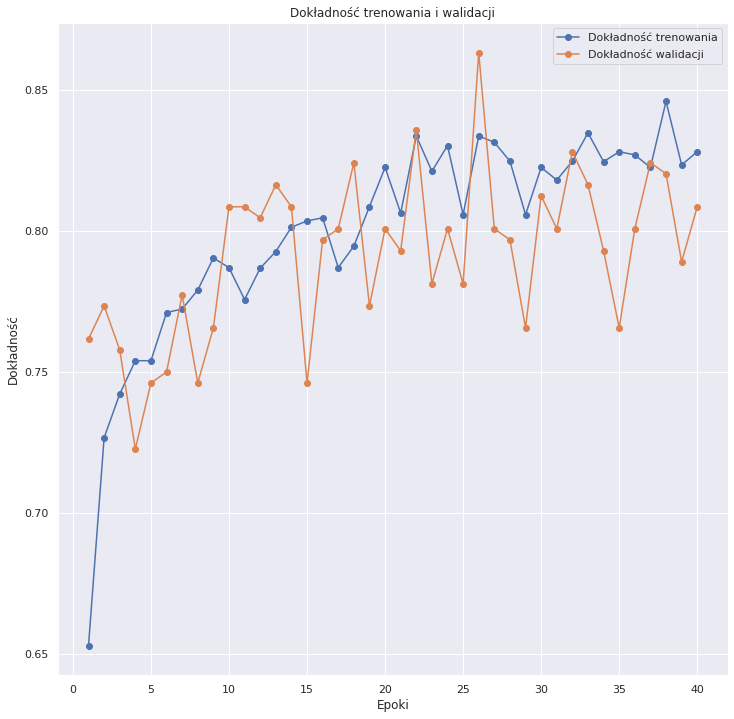

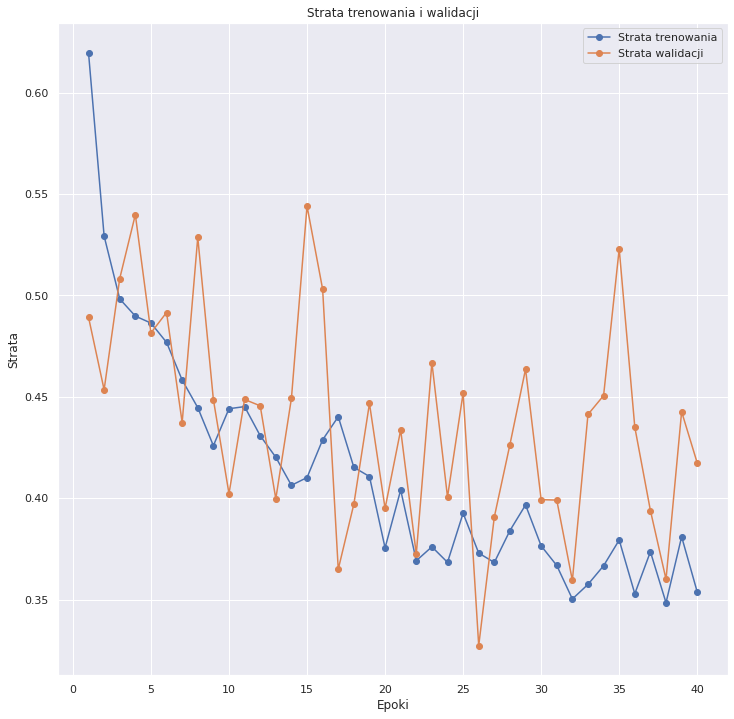

In [50]:
def make_accuracy_plot(history = history):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(12,12))
    plt.plot(epochs, acc, label = 'Dokładność trenowania', marker = 'o')
    plt.plot(epochs, val_acc, label = 'Dokładność walidacji', marker = 'o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history = history):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss)+1)

    plt.figure(figsize=(12,12))
    plt.plot(epochs, loss, label = 'Strata trenowania', marker = 'o')
    plt.plot(epochs, val_loss, label = 'Strata walidacji', marker = 'o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()
    
make_accuracy_plot(history)
make_loss_plot(history)

In [51]:
conv_base.trainable = True

def print_layers(model):
    for layer in model.layers:
        print(f'{layer.name}, {layer.trainable}')

print_layers(conv_base)

input_1, True
block1_conv1, True
block1_conv2, True
block1_pool, True
block2_conv1, True
block2_conv2, True
block2_pool, True
block3_conv1, True
block3_conv2, True
block3_conv3, True
block3_pool, True
block4_conv1, True
block4_conv2, True
block4_conv3, True
block4_pool, True
block5_conv1, True
block5_conv2, True
block5_conv3, True
block5_pool, True


In [52]:
set_trainable  = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print_layers(conv_base)

input_1, False
block1_conv1, False
block1_conv2, False
block1_pool, False
block2_conv1, False
block2_conv2, False
block2_pool, False
block3_conv1, False
block3_conv2, False
block3_conv3, False
block3_pool, False
block4_conv1, False
block4_conv2, False
block4_conv3, False
block4_pool, False
block5_conv1, True
block5_conv2, True
block5_conv3, True
block5_pool, True


In [53]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_____________

In [54]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch =steps_per_epoch,
                              epochs=40,
                              validation_steps=validation_steps,
                              validation_data=valid_generator,
                              callbacks=[tensorboard])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/40
28/28 [==============================] - 25s 855ms/step - loss: 0.6363 - accuracy: 0.6326 - val_loss: 0.5521 - val_accuracy: 0.7227
Epoch 2/40
28/28 [==============================] - 21s 762ms/step - loss: 0.5704 - accuracy: 0.7006 - val_loss: 0.4969 - val_accuracy: 0.7539
Epoch 3/40
28/28 [==============================] - 24s 879ms/step - loss: 0.4984 - accuracy: 0.7558 - val_loss: 0.5131 - val_accuracy: 0.7070
Epoch 4/40
28/28 [==============================] - 22s 801ms/step - loss: 0.5112 - accuracy: 0.7129 - val_loss: 0.4298 - val_accuracy: 0.7891
Epoch 5/40
28/28 [==============================] - 22s 775ms/step - loss: 0.4331 - accuracy: 0.8010 - val_loss: 0.4446 - val_accuracy: 0.7695
Epoch 6/40
28/28 [==============================] - 23s 835ms/step - loss: 0.4083 - accuracy: 0.7982 - val_loss: 0.4428 - val_accuracy: 0.7812
Epoch 7/40
28/28 [==============================] - 22s 802ms/step - loss: 0.4115 - accuracy: 0.7998 - val_loss: 0.4933 - val_accuracy: 0.7539

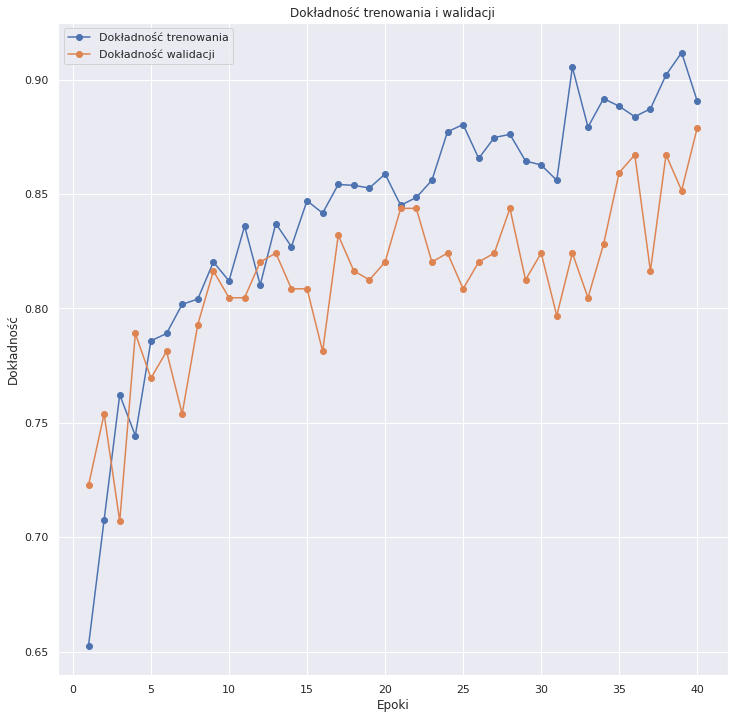

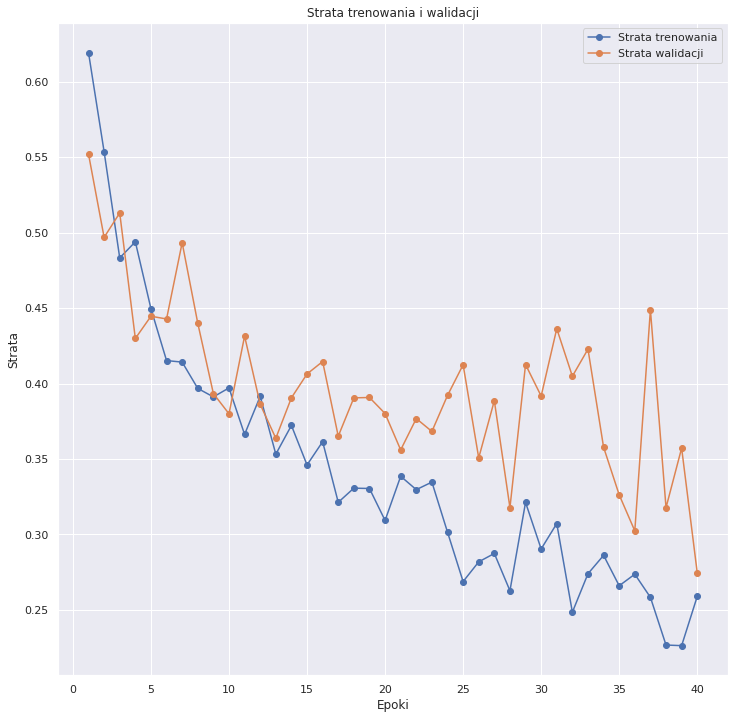

In [55]:
make_accuracy_plot(history)
make_loss_plot(history)

In [57]:
test_datagen = ImageDataGenerator(rescale = 1/255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

y_prob = model.predict_generator(test_generator, test_generator.samples)
y_prob = y_prob.ravel()
y_prob

Found 262 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



array([0.000002, 0.001113, 0.00008 , 0.002817, 0.015058, 0.004585,
       0.000115, 0.543003, 0.021928, 0.024866, 0.002418, 0.000642,
       0.068496, 0.984626, 0.000467, 0.00155 , 0.971685, 0.02821 ,
       0.323892, 0.000002, 0.011464, 0.006843, 0.000047, 0.002532,
       0.064808, 0.000086, 0.332135, 0.000568, 0.000009, 0.000522,
       0.17803 , 0.000377, 0.038546, 0.008548, 0.141266, 0.074422,
       0.027525, 0.109603, 0.001103, 0.017801, 0.005326, 0.000047,
       0.058418, 0.006309, 0.000303, 0.02766 , 0.163901, 0.010692,
       0.001548, 0.021321, 0.00029 , 0.005338, 0.097126, 0.001501,
       0.003771, 0.002673, 0.075366, 0.578505, 0.850408, 0.005361,
       0.00517 , 0.000175, 0.0005  , 0.316578, 0.002836, 0.000167,
       0.001839, 0.002571, 0.02086 , 0.010521, 0.247703, 0.130626,
       0.59524 , 0.047744, 0.052171, 0.952032, 0.149384, 0.00076 ,
       0.017652, 0.583403, 0.006002, 0.004336, 0.269262, 0.016072,
       0.427347, 0.012995, 0.006722, 0.095897, 0.002978, 0.000

In [59]:
import pandas as pd

predictions = pd.DataFrame({'y_prob': y_prob})
predictions['class'] = predictions.y_prob.apply(lambda x: 1 if x>0.5 else 0)
predictions

,y_prob,class
0,0.000002,0
1,0.001113,0
2,0.000080,0
3,0.002817,0
4,0.015058,0
...,...,...
257,0.999658,1
258,0.976386,1
259,0.999968,1
260,0.648824,1


In [60]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [61]:
y_pred = predictions['class'].values
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [62]:
test_generator.class_indices

{'drone': 0, 'passenger': 1}

In [63]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[119,  12],
       [ 21, 110]])

In [64]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       131
           1       0.90      0.84      0.87       131

    accuracy                           0.87       262
   macro avg       0.88      0.87      0.87       262
weighted avg       0.88      0.87      0.87       262



In [65]:
errors = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred}, index = test_generator.filenames)
errors

,y_true,y_pred
drone/00000000.jpg,0,0
drone/00000012.jpg,0,0
drone/00000013.jpg,0,0
drone/00000019.jpg,0,0
drone/00000044.jpg,0,0
...,...,...
passenger/00001426.jpg,1,1
passenger/00001431.jpg,1,1
passenger/00001465.jpg,1,1
passenger/00001479.jpg,1,1


In [66]:
errors['is_incorect'] = (errors.y_true != errors.y_pred)*1
errors

,y_true,y_pred,is_incorect
drone/00000000.jpg,0,0,0
drone/00000012.jpg,0,0,0
drone/00000013.jpg,0,0,0
drone/00000019.jpg,0,0,0
drone/00000044.jpg,0,0,0
...,...,...,...
passenger/00001426.jpg,1,1,0
passenger/00001431.jpg,1,1,0
passenger/00001465.jpg,1,1,0
passenger/00001479.jpg,1,1,0


In [67]:
errors[errors['is_incorect'] ==1].index

Index(['drone/00000079.jpg', 'drone/00000151.jpg', 'drone/00000175.jpg',
       'drone/00000641.jpg', 'drone/00000660.jpg', 'drone/00000799.png',
       'drone/00000828.jpg', 'drone/00000865.png', 'drone/00001009.jpg',
       'drone/00001119.jpg', 'drone/00001253.jpg', 'drone/00001325.jpg',
       'passenger/00000214.jpg', 'passenger/00000273.jpg',
       'passenger/00000307.jpg', 'passenger/00000362.jpg',
       'passenger/00000388.jpg', 'passenger/00000443.jpg',
       'passenger/00000514.png', 'passenger/00000675.jpg',
       'passenger/00000688.jpg', 'passenger/00000708.jpg',
       'passenger/00000713.jpg', 'passenger/00000714.jpg',
       'passenger/00000808.jpg', 'passenger/00000902.jpg',
       'passenger/00001034.jpg', 'passenger/00001077.jpg',
       'passenger/00001139.jpg', 'passenger/00001158.jpg',
       'passenger/00001177.jpg', 'passenger/00001222.jpg',
       'passenger/00001392.jpg'],
      dtype='object')

(-0.5, 1023.5, 767.5, -0.5)

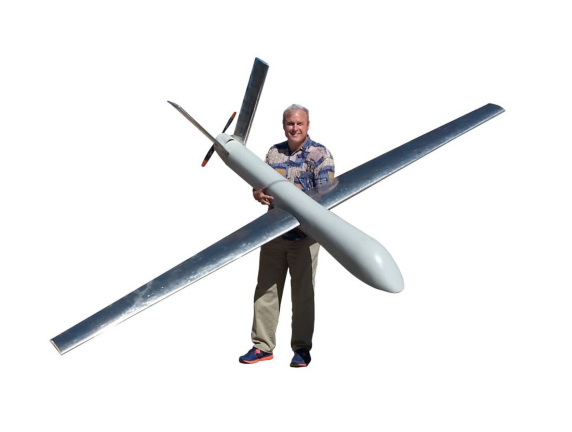

In [68]:
img_path = os.path.join(test_drone_dir, '00001253.jpg')

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid('off')
plt.axis('off')

(-0.5, 399.5, 224.5, -0.5)

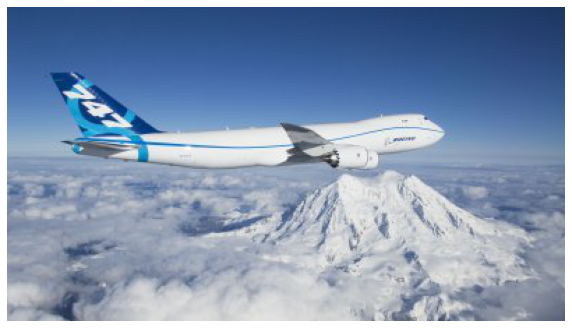

In [69]:
img_path = os.path.join(test_passenger_dir, '00001077.jpg')

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid('off')
plt.axis('off')